In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 100 # iterations over dataset

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Dropout(0.3)(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_2 = Dropout(0.3)(conv_2)
conv_2 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Dropout(0.3)(conv_3)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_2)
conv_2 = Dropout(0.3)(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)
conv_3 = Dropout(0.3)(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_4 = Dropout(0.3)(conv_4)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
#conv_1 = Dropout(0.5)(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_12 = Conv2D(32, (3,1), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation=LeakyReLU(0.3))(conv_2)
conv_21 = Dropout(0.3)(conv_21)
conv_22 = Conv2D(32, (3,1), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_4 = Dropout(0.3)(conv_4)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation=LeakyReLU(0.3))(X)
X = Conv2D(64, 3, activation=LeakyReLU(0.3))(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(256, activation=LeakyReLU(0.3))(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

In [ ]:

model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 32, 32, 32)   896         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 32, 32, 32)   9248        conv2d_204[0][0]                 
__________________________________________________________________________________________________
conv2d_206 (Conv2D)             (None, 32, 32, 32)   9248        conv2d_205[0][0]                 
______________________________________________________________________________________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate = 0.001,clipvalue = 0.5),
              metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# save model after each epoch
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint("Inception_Adam_dropout.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)
#hist=model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test),callbacks=[early,checkpoint])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Epoch 1/100
391/390 [==============================] - ETA: 0s - loss: 3.9352 - accuracy: 0.0989
Epoch 00001: val_accuracy improved from -inf to 0.15260, saving model to Inception_Adam_dropout.hdf5
391/390 [==============================] - 68s 174ms/step - loss: 3.9352 - accuracy: 0.0989 - val_loss: 3.6308 - val_accuracy: 0.1526
Epoch 2/100
391/390 [==============================] - ETA: 0s - loss: 3.3008 - accuracy: 0.2014
Epoch 00002: val_accuracy improved from 0.15260 to 0.24050, saving model to Inception_Adam_dropout.hdf5
391/390 [==============================] - 68s 173ms/step - loss: 3.3008 - accuracy: 0.2014 - val_loss: 3.1405 - val_accuracy: 0.2405
Epoch 3/100
391/390 [==============================] - ETA: 0s - loss: 3.0207 - accuracy: 0.2545
Epoch 00003: val_accuracy improved from 0.24050 to 0.24130, saving model to Inception_Adam_dropout.hdf5
391/390 [==============================] - 67s 172ms/step - loss: 3.0207 - accuracy: 0.2545 - val_loss: 3.2918 - val_accuracy: 0.241

In [ ]:
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
#print(classification_report(y_true,y_pred))
#confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.5755537106710966
Recall: 0.4899
Accuracy: 0.4899


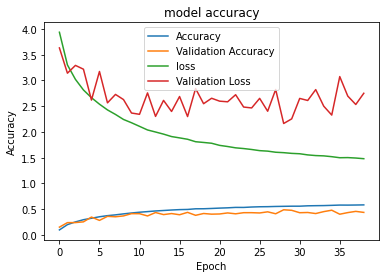

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# cell to load best weights

In [3]:
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping

#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Dropout(0.3)(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_2 = Dropout(0.3)(conv_2)
conv_2 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Dropout(0.3)(conv_3)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_2)
conv_2 = Dropout(0.3)(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)
conv_3 = Dropout(0.3)(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_4 = Dropout(0.3)(conv_4)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
#conv_1 = Dropout(0.5)(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_12 = Conv2D(32, (3,1), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation=LeakyReLU(0.3))(conv_2)
conv_21 = Dropout(0.3)(conv_21)
conv_22 = Conv2D(32, (3,1), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_4 = Dropout(0.3)(conv_4)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation=LeakyReLU(0.3))(X)
X = Conv2D(64, 3, activation=LeakyReLU(0.3))(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(256, activation=LeakyReLU(0.3))(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping

(x_train, Y_train), (x_test, Y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255
from keras.utils import to_categorical
y_train = to_categorical(Y_train,100)
y_test = to_categorical(Y_test,100)

#model = create_model()
model.load_weights('Inception_Adam_dropout.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.5755537106710966
Recall: 0.4899
Accuracy: 0.4899


In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Dropout(0.3)(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation=LeakyReLU(0.3))(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_2 = Dropout(0.3)(conv_2)
conv_2 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Dropout(0.3)(conv_3)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_1 = Dropout(0.3)(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation=LeakyReLU(0.3))(conv_2)
conv_2 = Dropout(0.3)(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)
conv_3 = Dropout(0.4)(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_4 = Dropout(0.3)(conv_4)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
#conv_1 = Dropout(0.5)(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation=LeakyReLU(0.3))(conv_1)
conv_12 = Conv2D(32, (3,1), padding='same', activation=LeakyReLU(0.3))(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation=LeakyReLU(0.3))(conv_2)
conv_21 = Dropout(0.3)(conv_21)
conv_22 = Conv2D(32, (3,1), padding='same', activation=LeakyReLU(0.3))(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation=LeakyReLU(0.3))(X)
conv_4 = Dropout(0.3)(conv_4)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation=LeakyReLU(0.3))(X)
X = Conv2D(64, 3, activation=LeakyReLU(0.3))(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(256, activation=LeakyReLU(0.3))(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

#model = create_model()
model.load_weights('../weights/InceptionV2_Adam_With_DropOut.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
